In [1]:
# Подключаем необходимые библиотеки
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Преобразуем csv файл в dataframe
data = pd.read_csv("dataset.csv", delimiter=';')
data

,type,price,priсePerEarthsquare,houseSquare,earthSquare,floors,place,URL
0,cottage,78000000,197468,395.0,22.30,4.0,Калужское шоссе,https://www.cian.ru/sale/suburban/248884179/
1,cottage,88500000,305172,290.0,17.58,2.0,Киевское шоссе,https://www.cian.ru/sale/suburban/256413509/
2,cottage,97007894,195976,495.0,20.00,2.0,Калужское шоссе,https://www.cian.ru/sale/suburban/238388603/
3,house,65655917,76755,855.4,20.10,2.0,Киевское шоссе,https://www.cian.ru/sale/suburban/249971632/
4,cottage,33500000,97101,345.0,10.00,2.0,Калужское шоссе,https://www.cian.ru/sale/suburban/264321673/
...,...,...,...,...,...,...,...,...
1476,house,23990000,99958,240.0,10.00,2.0,Калужское шоссе,https://www.cian.ru/sale/suburban/251276213/
1477,house,29900000,178188,167.8,13.00,NaN,Калужское шоссе,https://www.cian.ru/sale/suburban/235546341/
1478,house,33300000,100909,330.0,10.00,3.0,Калужское шоссе,https://www.cian.ru/sale/suburban/258318045/
1479,cottage,26500000,129268,205.0,9.00,2.0,Калужское шоссе,https://www.cian.ru/sale/suburban/258596533/


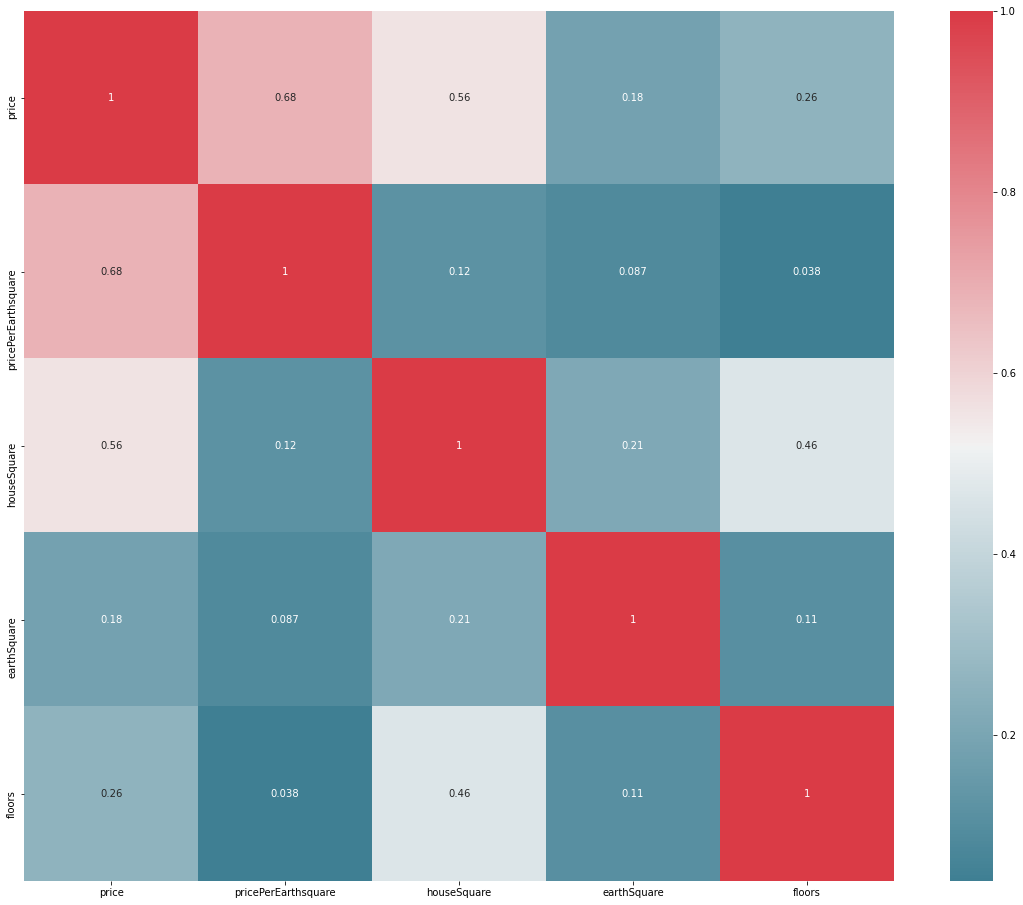

In [3]:
# Строим таблицу корреляции
f, ax = plt.subplots(figsize=(20, 16))
corr = data.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.savefig('correlation.png')

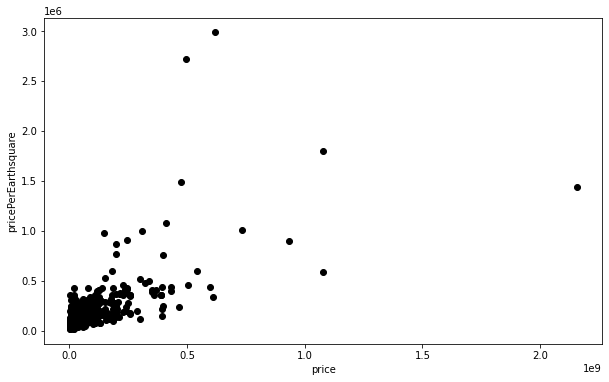

In [4]:
# Строим точечный график (1)
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = data['price'], y = data['priсePerEarthsquare'], color="black")


plt.xlabel("price")
plt.ylabel("priсePerEarthsquare")

plt.savefig('price-priсePerEarthsquare.png')

plt.show()

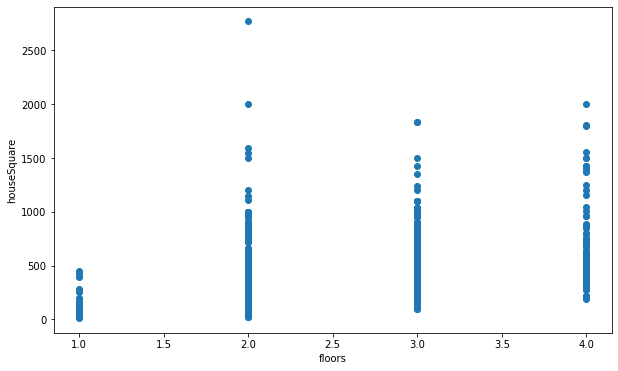

In [5]:
# Строим точечный график (2)
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = data['floors'], y = data['houseSquare'])

plt.xlabel("floors")
plt.ylabel("houseSquare")

plt.savefig('floors-houseSquare.png')

plt.show()

In [6]:
# Удаляем ненужные столбцы dataframe
data.drop('URL', axis=1, inplace=True)
data.drop('type', axis=1, inplace=True)

In [7]:
# Заменяем данные в столбце 'place'
data.loc[(data['place'] == 'Калужское шоссе'), 'place'] = 0
data.loc[(data['place'] == 'Киевское шоссе'), 'place'] = 1
data.loc[(data['place'] == 'Дмитровское шоссе'), 'place'] = 2
data.loc[(data['place'] == 'Минское шоссе'), 'place'] = 3
data.loc[(data['place'] == 'Симферопольское шоссе'), 'place'] = 4
data.loc[(data['place'] == 'Алтуфьевское шоссе'), 'place'] = 5
data.loc[(data['place'] == 'Ленинградское шоссе'), 'place'] = 6
data.loc[(data['place'] == 'Варшавское шоссе'), 'place'] = 7
data.loc[(data['place'] == 'Боровское шоссе'), 'place'] = 8
data.loc[(data['place'] == 'Сколковское шоссе'), 'place'] = 9
data.loc[(data['place'] == 'Куркинское шоссе'), 'place'] = 10
data.loc[(data['place'] == 'Рублево-Успенское шоссе'), 'place'] = 11
data.loc[(data['place'] == 'Каширское шоссе'), 'place'] = 12
data.loc[(data['place'] == 'Новорижское шоссе'), 'place'] = 13
data.loc[(data['place'] == 'Рублевское шоссе'), 'place'] = 14
data.loc[(data['place'] == 'Новорязанское шоссе'), 'place'] = 15
data.loc[(data['place'] == 'А-105 шоссе'), 'place'] = 16
data.loc[(data['place'] == 'Носовихинское шоссе'), 'place'] = 17
data.loc[(data['place'] == 'Можайское шоссе'), 'place'] = 18
data.loc[(data['place'] == 'Косинское шоссе'), 'place'] = 19
data['place'].fillna(data['place'].median(), inplace=True)
data['place'] = data['place'].astype(np.float64)

In [8]:
# Заполняем все NaN медианными значениями столбца
data['earthSquare'].fillna(data['earthSquare'].median(), inplace=True)

In [9]:
# Заполняем все NaN медианными значениями столбца
data['floors'].fillna(data['floors'].median(), inplace=True)

In [10]:
data

,price,priсePerEarthsquare,houseSquare,earthSquare,floors,place
0,78000000,197468,395.0,22.30,4.0,0.0
1,88500000,305172,290.0,17.58,2.0,1.0
2,97007894,195976,495.0,20.00,2.0,0.0
3,65655917,76755,855.4,20.10,2.0,1.0
4,33500000,97101,345.0,10.00,2.0,0.0
...,...,...,...,...,...,...
1476,23990000,99958,240.0,10.00,2.0,0.0
1477,29900000,178188,167.8,13.00,2.0,0.0
1478,33300000,100909,330.0,10.00,3.0,0.0
1479,26500000,129268,205.0,9.00,2.0,0.0


In [11]:
# Удаляем столбец цен из dataframe и записываем его в отдельный массив
prices = data['price']
features = data.drop('price', axis = 1)

In [12]:
# Производим разделение данных
x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state = 42)

In [13]:
x_train

,priсePerEarthsquare,houseSquare,earthSquare,floors,place
381,167742,1550.0,75.0,2.0,1.0
532,115625,320.0,10.0,3.0,8.0
755,311688,192.5,15.0,1.0,0.0
482,278571,700.0,27.0,3.0,6.0
405,115909,220.0,9.0,2.0,0.0
...,...,...,...,...,...
1130,70755,212.0,14.0,4.0,0.0
1294,134146,164.0,13.0,2.0,1.0
860,229592,196.0,27.0,2.0,1.0
1459,76250,400.0,12.8,2.0,1.0


In [14]:
x_test

,priсePerEarthsquare,houseSquare,earthSquare,floors,place
123,99000,100.0,5.5,2.0,1.0
432,104545,440.0,8.0,3.0,0.0
1030,30000,350.0,24.0,4.0,7.0
529,184211,190.0,7.1,4.0,0.0
1414,75135,370.0,8.0,3.0,0.0
...,...,...,...,...,...
1098,79412,170.0,6.0,2.0,7.0
1307,127778,180.0,48.0,2.0,1.0
543,117231,390.0,10.0,2.0,1.0
1469,68330,461.0,16.0,2.0,3.0


In [15]:
y_train

381     260000000
532      37000000
755      60000000
482     195000000
405      25500000
          ...    
1130     15000000
1294     22000000
860      45000000
1459     30500000
1126     14800000
Name: price, Length: 1184, dtype: int64

In [16]:
y_test

123      9900000
432     46000000
1030    10500000
529     35000000
1414    27800000
          ...   
1098    13500000
1307    23000000
543     45720000
1469    31500000
1010     9500000
Name: price, Length: 297, dtype: int64

In [17]:
# Создаем модель линейной регрессии
model = LinearRegression()

In [18]:
# Обучаем модель 
model.fit(x_train, y_train)

LinearRegression()

In [19]:
# Создаем предсказания
predictions = model.predict(x_test)

In [20]:
# Точность предсказаний
r2_score(y_test, predictions)

0.5782895682233715

In [21]:
len(predictions), len(y_test)

(297, 297)

In [22]:
# Округление данных в массиве предсказаний 
predictions = [round(i, 1) for i in predictions]

In [23]:
a, b, razn = list(predictions), list(y_test), list()

In [24]:
# Вывод результатов
print('Предсказания - реальная цена - разница')
for i in range(len(a)):
    razn.append(round(abs(a[i] - b[i]), 1))
    print(f'{a[i]} - {b[i]} - {round(abs(a[i] - b[i]), 1)}')

Предсказания - реальная цена - разница
-1905106.1 - 9900000 - 11805106.1
52246327.7 - 46000000 - 6246327.7
18861225.9 - 10500000 - 8361225.9
34417488.5 - 35000000 - 582511.5
30974164.0 - 27800000 - 3174164.0
15498111.9 - 18990000 - 3491888.1
66016422.5 - 60053420 - 5963002.5
37198835.6 - 25000000 - 12198835.6
10758627.0 - 15700000 - 4941373.0
49291887.4 - 46000000 - 3291887.4
-2915355.2 - 10700000 - 13615355.2
43053578.9 - 38135599 - 4917979.9
23209009.6 - 17900000 - 5309009.6
70002781.7 - 55000000 - 15002781.7
46859098.9 - 45000000 - 1859098.9
41512754.3 - 32000000 - 9512754.3
66666721.0 - 67500000 - 833279.0
54610841.4 - 49500000 - 5110841.4
83262610.7 - 80000000 - 3262610.7
22372079.9 - 25000000 - 2627920.1
97906298.7 - 50000000 - 47906298.7
50952793.5 - 29500000 - 21452793.5
33333660.1 - 29500000 - 3833660.1
85836612.7 - 75000000 - 10836612.7
79645686.8 - 65000000 - 14645686.8
25927541.2 - 23500000 - 2427541.2
50952793.5 - 29500000 - 21452793.5
36493574.6 - 30590000 - 5903574.6
862

In [25]:
# Преобразование list() в np.array()
razn = np.array(razn)
razn

array([1.18051061e+07, 6.24632770e+06, 8.36122590e+06, 5.82511500e+05,
       3.17416400e+06, 3.49188810e+06, 5.96300250e+06, 1.21988356e+07,
       4.94137300e+06, 3.29188740e+06, 1.36153552e+07, 4.91797990e+06,
       5.30900960e+06, 1.50027817e+07, 1.85909890e+06, 9.51275430e+06,
       8.33279000e+05, 5.11084140e+06, 3.26261070e+06, 2.62792010e+06,
       4.79062987e+07, 2.14527935e+07, 3.83366010e+06, 1.08366127e+07,
       1.46456868e+07, 2.42754120e+06, 2.14527935e+07, 5.90357460e+06,
       3.12963281e+07, 1.11067828e+07, 5.44029930e+06, 8.51292779e+07,
       2.21113058e+07, 2.52726717e+07, 1.98050597e+07, 1.88037891e+07,
       3.22495972e+07, 6.50936280e+06, 1.01880821e+07, 9.45445730e+06,
       3.67249854e+07, 1.67120184e+08, 2.56862671e+07, 3.45039210e+06,
       7.03930280e+06, 4.06652440e+06, 1.91760784e+07, 4.63189710e+06,
       1.64002580e+07, 5.39730770e+06, 1.29660481e+07, 2.30909500e+05,
       1.87064340e+07, 1.02474598e+07, 8.47840260e+06, 3.27669350e+06,
      

In [26]:
# Медианное значение разниц предсказаний от реальной стоимости
np.median(razn)

8035692.2